# Assignmnet 1
## Question 1
### SA vehicles age profile

In [949]:
# Import dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [950]:
# Load the data from the Excel file
file_path = 'Vehicle emissions data.xlsx'
sheet_name = 'SA vehicles age profile'

# Read the Excel file into a Pandas DataFrame
df_vehicle_emissions = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the DataFrame to see the data structure
print(df_vehicle_emissions.head())

  PROVINCE Age Group  Heavy load veh(GVM>3500Kg equip to draw)  \
0       EC     0 - 5                                    5317.0   
1      NaN    6 - 10                                    3438.0   
2      NaN   11 - 15                                    3576.0   
3      NaN   16 - 20                                    2170.0   
4      NaN   21 - 25                                     808.0   

   Heavy load veh(GVM>3500Kg, not to draw)  \
0                                   2490.0   
1                                   3858.0   
2                                   2472.0   
3                                   1541.0   
4                                    996.0   

   Heavy passenger mv (12 or more persons)  \
0                                   9770.0   
1                                   7252.0   
2                                   6303.0   
3                                   1876.0   
4                                    519.0   

   Light load vehicle (GVM 3500Kg or less)  \
0  

### VKT by age

In [951]:
# Load the data from the Excel file
sheet_name = 'VKT by age'

# Read the Excel file into a Pandas DataFrame
df_VKT = pd.read_excel(file_path, sheet_name=sheet_name)

df_VKT['Age'] = range(1, 22)

# Fill NaN values with zeros
#df_VKT.fillna(0, inplace=True)

# Display the DataFrame to see the data structure
print(df_VKT.head())

   Age  LDPV (private car)  LDPV (taxi)  HDPV (non-commercial)  HDPV (bus)  \
0    1                27.0        135.0                   57.0       130.0   
1    2                24.0        122.0                   52.0       110.0   
2    3                20.0        112.0                   48.0        95.0   
3    4                19.0        104.0                   44.0        85.0   
4    5                18.0         97.0                   40.0        75.0   

    LDT    HDT  
0  47.0  100.0  
1  42.0   90.0  
2  38.0   80.0  
3  34.0   70.0  
4  30.0   60.0  


### Emissions by vehicle type

In [952]:
# Load the data from the Excel file
sheet_name = 'Emissions by vehicle type'

# Read the Excel file into a Pandas DataFrame
df_type = pd.read_excel(file_path, sheet_name=sheet_name)

# Fill NaN values with zeros
#df_type.fillna(0, inplace=True)

# Display the DataFrame to see the data structure
print(df_type.head())

                             Unnamed: 0  \
0                         Vehicle Class   
1          Light Duty Passenger Vehicle   
2  Medium Duty Passenger Vehicle petrol   
3  Medium Duty Passenger Vehicle diesel   
4   Heavy Duty Passenger Vehicle diesel   

  Fleet-average emissions factors (g/km) Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0                                     CO         HC        NOx      PM2.5   
1                                   1.74       0.34       0.28      0.006   
2                                    2.8       1.78       1.03       0.03   
3                                    1.6       0.27       1.44       0.26   
4                                   4.76       0.25       10.9       0.48   

  Unnamed: 5  
0        CO2  
1        263  
2        379  
3        307  
4        914  


### Emission Factors over Age

In [953]:
# Load the data from the Excel file
sheet_name = 'Emission Factors over Age'

# Read the Excel file into a Pandas DataFrame
df_age = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=1)

# Display the DataFrame to see the data structure
print(df_age.head())

   Age (years)  Gasoline light duty vehicles  Gasoline light duty vehicles.1  \
0            0                          11.0                            0.75   
1            1                          11.0                            0.80   
2            2                          12.0                            0.85   
3            3                          13.0                            0.90   
4            4                          14.0                            0.90   

   Gasoline light duty vehicles.2  
0                             0.7  
1                             0.8  
2                             0.9  
3                             1.0  
4                             1.1  


### Emissions by vehicle speed

In [954]:
# Load the data from the Excel file
sheet_name = 'Emissions by vehicle speed'

# Read the Excel file into a Pandas DataFrame
df_speed = pd.read_excel(file_path, sheet_name=sheet_name)

# Fill NaN values with zeros
#df_speed.fillna(0, inplace=True)

# Display the DataFrame to see the data structure
print(df_speed.head())

      Unnamed: 0 Fleet-average emissions factors (g/mi) Unnamed: 2 Unnamed: 3  \
0            NaN                              Pollutant         CO        NaN   
1  Vehicle Class                                     MC       LDGV       LDDV   
2    Speed (mph)                                    NaN        NaN        NaN   
3             15                                   21.5         15        2.5   
4             20                                     18         14        2.3   

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0        NaN        NaN        NaN        NaN   
1       LDGT       LDDT       HDGV       HDDV   
2        NaN        NaN        NaN        NaN   
3         18        2.7         38        6.5   
4         17        2.5         28          5   

   Fleet-average emissions factors (g/km)  
0                                     NaN  
1                                     NaN  
2                                     NaN  
3                                     NaN 

## Question 2
### a)

In [955]:
# Load the data from the Excel file
sheet_name = 'VKT by age'

# Read the Excel file into a Pandas DataFrame
df_VKT = pd.read_excel(file_path, sheet_name=sheet_name)

df_VKT['Age'] = range(1, 22)

# Remove leading and trailing whitespaces from column names
df_VKT.columns = df_VKT.columns.str.strip()

# Fit polynomials of order 1 to 5 for each column and determine the best order
age_values = df_VKT['Age'].values
age_range = np.arange(1, 101)  # Age range from 1 to 100

df_extended_VKT = pd.DataFrame({'Age': age_range})
best_orders = {}
best_coeffs = {}

for col in df_VKT.columns[1:]:
    VKT_values = df_VKT[col].values
    
    if np.isnan(VKT_values).all():
        print(f"Skipping column '{col}' due to all NaN values")
        continue
    
    non_nan_indices = ~np.isnan(VKT_values)  # Find non-NaN indices
    
    best_order = 0
    min_std = float('inf')

    for order in range(1, 6):
        poly_coeffs = np.polyfit(age_values[non_nan_indices], VKT_values[non_nan_indices], deg=order)
        poly_func = np.poly1d(poly_coeffs)

        # Evaluate the polynomial for the extended age range (ages 1 to 100)
        VKT_interpolated = poly_func(age_range)

        # Calculate the residuals and standard deviation
        residuals = VKT_values[non_nan_indices] - poly_func(age_values[non_nan_indices])
        std = np.std(residuals)

        # Update the best order if the current order gives a lower standard deviation
        if std < min_std:
            min_std = std
            best_order = order
            best_coeffs[col] = poly_coeffs

    # Fit the polynomial of the best order again and append to the new DataFrame
    poly_coeffs = best_coeffs[col]
    poly_func = np.poly1d(poly_coeffs)
    VKT_interpolated = poly_func(age_range)

    # Replace negative values with zero
    VKT_interpolated[VKT_interpolated < 0] = 0

    # Add the interpolated VKT data to the new DataFrame
    df_extended_VKT[col] = VKT_interpolated

    # Store the best order for the vehicle class
    best_orders[col] = best_order

# Print the polynomial coefficients for each vehicle class
for col in df_extended_VKT.columns[1:]:
    print(f"{col} (Order {best_orders[col]}):")
    print(f"Coefficients: {best_coeffs.get(col, None)}")

# Create a list to store the polynomial coefficients
coefficients_list = []

# Print the polynomial coefficients for each vehicle class
for col in df_extended_VKT.columns[1:]:
    vehicle_class = col
    order = best_orders[col]
    coefficients = best_coeffs.get(col, None)

    if coefficients is not None:
        coefficients_list.append({'Vehicle Class': vehicle_class,
                                  'Order': order,
                                  'Coefficients': coefficients})

# Create the DataFrame from the list of coefficients
coefficients_df = pd.DataFrame(coefficients_list)
coefficients_df.to_excel('Polynomial Coefficients.xlsx', index=False)

print("Polynomial Coefficients:")
print(coefficients_df)
# Display the extended VKT data
# print(df_extended_VKT)

LDPV (private car) (Order 5):
Coefficients: [-8.46474834e-05  5.03447594e-03 -1.10848578e-01  1.14061294e+00
 -6.45459301e+00  3.25247457e+01]
LDPV (taxi) (Order 5):
Coefficients: [ 1.28205128e-03 -1.55885781e-02 -8.01282051e-02  2.22129953e+00
 -1.88821096e+01  1.51750000e+02]
HDPV (non-commercial) (Order 5):
Coefficients: [ 1.42804878e-05 -5.62967342e-04 -1.03858485e-03  3.22873804e-01
 -6.01637778e+00  6.28115878e+01]
HDPV (bus) (Order 5):
Coefficients: [-6.21576566e-04  3.09841990e-02 -5.97712118e-01  5.85457080e+00
 -3.43902372e+01  1.59299301e+02]
LDT (Order 5):
Coefficients: [ 4.45641819e-04 -1.82478512e-02  2.56274356e-01 -1.24813538e+00
 -2.16383749e+00  5.00125874e+01]
HDT (Order 5):
Coefficients: [ 6.58887037e-04 -3.07188941e-02  5.01977383e-01 -2.97400626e+00
 -3.39372506e+00  1.05678322e+02]
Polynomial Coefficients:
           Vehicle Class  Order  \
0     LDPV (private car)      5   
1            LDPV (taxi)      5   
2  HDPV (non-commercial)      5   
3             HDPV 

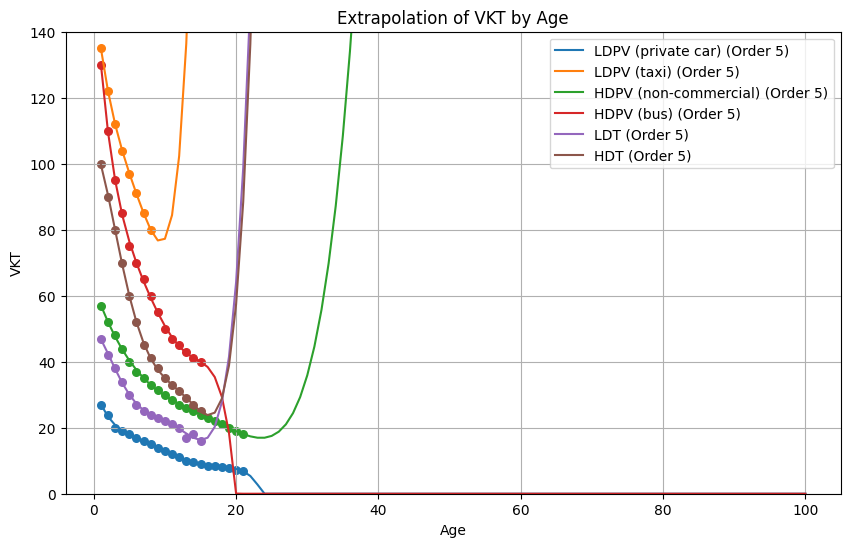

In [956]:
# Plot the extrapolation results for each vehicle class
plt.figure(figsize=(10, 6))
for col in df_extended_VKT.columns[1:]:
    plt.plot(df_extended_VKT['Age'], df_extended_VKT[col], label=f"{col} (Order {best_orders[col]})")

# Plot the original data points for reference
for col in df_VKT.columns[1:]:
    valid_indices = ~np.isnan(df_VKT[col])
    plt.scatter(df_VKT['Age'][valid_indices], df_VKT[col][valid_indices], marker='o', s=30)

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('VKT')
plt.ylim([0, 140])
plt.title('Extrapolation of VKT by Age')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

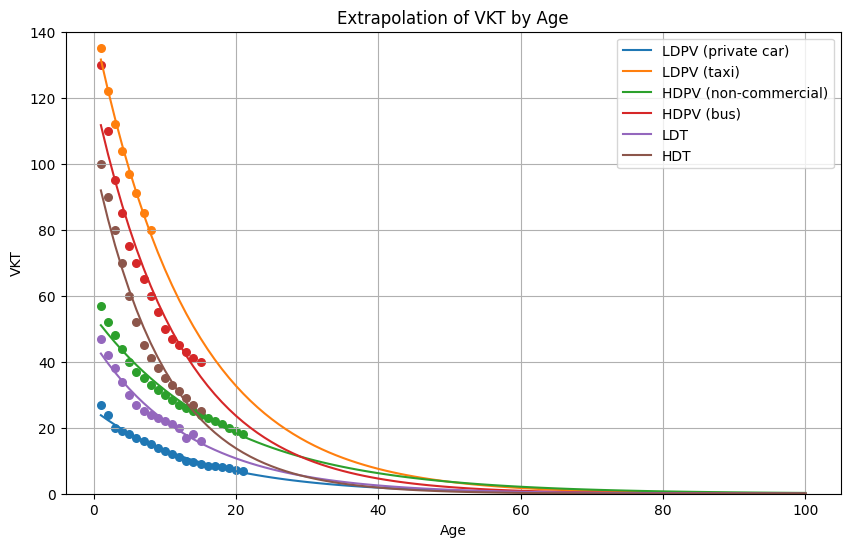

In [957]:
# Load the data from the Excel file
sheet_name = 'VKT by age'
df_VKT = pd.read_excel(file_path, sheet_name=sheet_name)

df_VKT['Age'] = range(1, 22)

# Remove leading and trailing whitespaces from column names
df_VKT.columns = df_VKT.columns.str.strip()

# Fit decaying exponential functions for each column
age_values = df_VKT['Age'].values
age_range = np.arange(1, 101)  # Age range from 1 to 100

df_extended_VKT = pd.DataFrame({'Age': age_range})

for col in df_VKT.columns[1:]:
    VKT_values = df_VKT[col].values
    
    if np.isnan(VKT_values).all():
        print(f"Skipping column '{col}' due to all NaN values")
        continue
    
    non_nan_indices = ~np.isnan(VKT_values)  # Find non-NaN indices
    
    decay_coeffs = np.polyfit(age_values[non_nan_indices], np.log(VKT_values[non_nan_indices]), deg=1)
    decay_func = np.poly1d(decay_coeffs)
    
    # Evaluate the decaying exponential function for the extended age range (ages 1 to 100)
    VKT_interpolated = np.exp(decay_func(age_range))
    
    # Replace negative values with zero
    VKT_interpolated[VKT_interpolated < 0] = 0
    
    # Add the interpolated VKT data to the new DataFrame
    df_extended_VKT[col] = VKT_interpolated

df_extended_VKT.to_excel('Extended VKT.xlsx', index=False)

# Plot the extrapolation results for each vehicle class
plt.figure(figsize=(10, 6))
for col in df_extended_VKT.columns[1:]:
    plt.plot(df_extended_VKT['Age'], df_extended_VKT[col], label=f"{col}")

# Plot the original data points for reference
for col in df_VKT.columns[1:]:
    valid_indices = ~np.isnan(df_VKT[col])
    plt.scatter(df_VKT['Age'][valid_indices], df_VKT[col][valid_indices], marker='o', s=30)

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('VKT')
plt.ylim([0, 140])
plt.title('Extrapolation of VKT by Age')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### b)

In [958]:
# Fill NaN values with zeros
df_age.fillna(0, inplace=True)

# Fit polynomials for each column and find the best order
age_values = df_age['Age (years)'].values
age_range = np.arange(0, 101)  # Age range from 0 to 100

df_extended_age = pd.DataFrame({'Age (years)': age_range})

best_orders = {}  # To store the best polynomial orders for each column
for col in df_age.columns[1:]:
    emissions_values = df_age[col].values
    best_order = None
    best_residual = float('inf')

    for order in range(1, 3):  # Try polynomial orders from 1 to 2
        poly_coeffs = np.polyfit(age_values, emissions_values, deg=order)
        poly_func = np.poly1d(poly_coeffs)

        # Evaluate the polynomial for the extended age range (ages 0 to 100)
        emissions_interpolated = poly_func(age_range)

        # Calculate residuals and choose the best order based on the standard deviation of residuals
        residuals = emissions_values - poly_func(age_values)
        residual_std = np.std(residuals)

        if residual_std < best_residual:
            best_residual = residual_std
            best_order = order

        # Add the interpolated emissions data to the new DataFrame
        df_extended_age[col] = emissions_interpolated

    # Store the best order for each column
    best_orders[col] = best_order

    # Print the column name and best order
    print(f"{col}: Best polynomial order = {best_order}")

    # Apply upper limit of 50 to extrapolated values
    df_extended_age[col] = df_extended_age[col].apply(lambda x: min(x, 50))

# Display the extended emissions data
print(df_extended_age)

Gasoline light duty vehicles: Best polynomial order = 2
Gasoline light duty vehicles.1: Best polynomial order = 2
Gasoline light duty vehicles.2: Best polynomial order = 2
     Age (years)  Gasoline light duty vehicles  \
0              0                     11.039474   
1              1                     11.564241   
2              2                     12.129450   
3              3                     12.735101   
4              4                     13.381192   
..           ...                           ...   
96            96                     50.000000   
97            97                     50.000000   
98            98                     50.000000   
99            99                     50.000000   
100          100                     50.000000   

     Gasoline light duty vehicles.1  Gasoline light duty vehicles.2  
0                          0.786842                        0.639474  
1                          0.805779                        0.734727  
2                

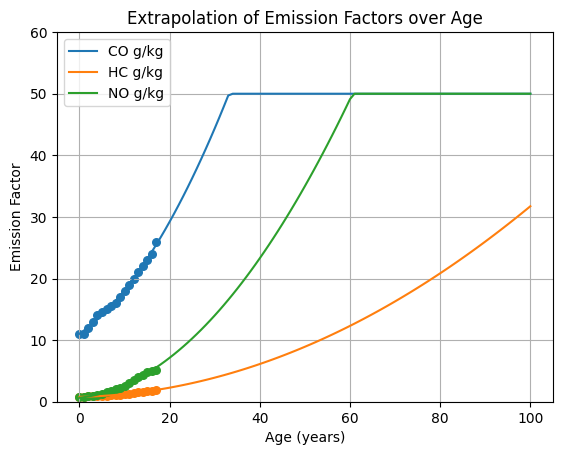

Gasoline light duty vehicles Polynomial Coefficients: [ 0.02022059  0.50454721 11.03947368]
Gasoline light duty vehicles.1 Polynomial Coefficients: [0.00293473 0.01600232 0.78684211]
Gasoline light duty vehicles.2 Polynomial Coefficients: [0.01208075 0.08317208 0.63947368]


In [959]:
labels = ['CO g/kg', 'HC g/kg', 'NO g/kg']
i = 0

# Plot the extrapolation results for each vehicle class
for col in df_extended_age.columns[1:]:
    plt.plot(df_extended_age['Age (years)'], df_extended_age[col], label=labels[i])
    i += 1

# Plot the original data points for reference
for col in df_age.columns[1:]:
    valid_indices = ~np.isnan(df_age[col])
    plt.scatter(df_age['Age (years)'][valid_indices], df_age[col][valid_indices], marker='o', s=30)

# Add labels and legend
plt.xlabel('Age (years)')
plt.ylabel('Emission Factor')
plt.ylim([0, 60])  # Adjust the y-axis limits if necessary
plt.title('Extrapolation of Emission Factors over Age')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Print the polynomial coefficients for each column
for col in df_age.columns[1:]:
    poly_coeffs = np.polyfit(age_values, df_age[col].values, deg=best_orders[col])
    print(f"{col} Polynomial Coefficients: {poly_coeffs}")

# Save to excel sheet
df_extended_age.to_excel('extrapolated_age.xlsx')

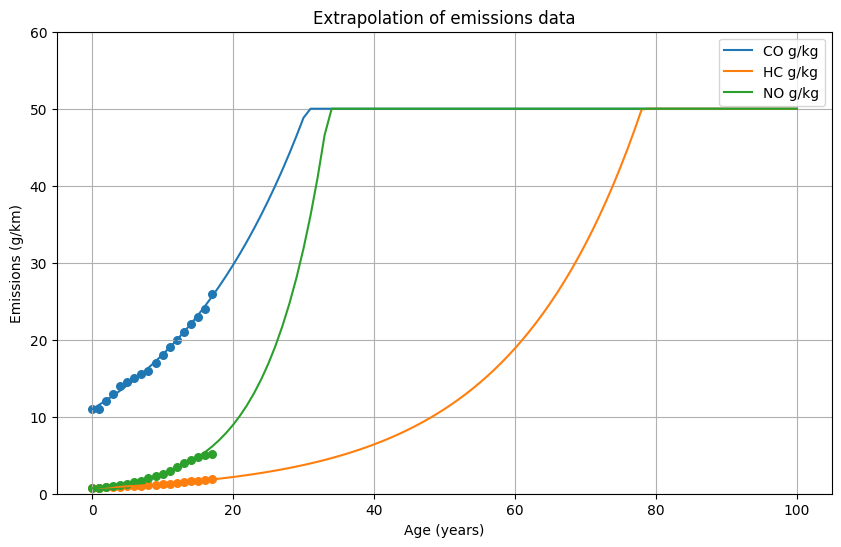

In [960]:
# Fit polynomials for each column and find the best order
age_values = df_age['Age (years)'].values
age_range = np.arange(0, 101)  # Age range from 0 to 100

df_extended_age = pd.DataFrame({'Age (years)': age_range})

for col in df_age.columns[1:]:
    emissions_values = df_age[col].values
    
    if np.isnan(emissions_values).all():
        print(f"Skipping column '{col}' due to all NaN values")
        continue

    non_nan_indices = ~np.isnan(emissions_values)  # Find non-NaN indices

    decay_coeffs = np.polyfit(age_values[non_nan_indices], np.log(emissions_values[non_nan_indices]), deg=1)
    decay_func = np.poly1d(decay_coeffs)

    # Evaluate the decaying exponential function for the extended age range (ages 1 to 100)
    emisions_interpolated = np.exp(decay_func(age_range))
    
    # Replace negative values with zero
    emisions_interpolated[emisions_interpolated < 0] = 0
    
    # Add the interpolated VKT data to the new DataFrame
    df_extended_age[col] = emisions_interpolated

    # Apply upper limit of 50 to extrapolated values
    df_extended_age[col] = df_extended_age[col].apply(lambda x: min(x, 50))

labels = ['CO g/kg', 'HC g/kg', 'NO g/kg']
i = 0

# Plot the extrapolation results for each vehicle class
plt.figure(figsize=(10, 6))
for col in df_extended_age.columns[1:]:
    plt.plot(df_extended_age['Age (years)'], df_extended_age[col], label=labels[i])
    i += 1

# Plot the original data for reference
for col in df_age.columns[1:]:
    valid_indices = ~np.isnan(df_age[col])
    plt.scatter(df_age['Age (years)'][valid_indices], df_age[col][valid_indices], marker='o', s=30)

# Add labels
plt.xlabel('Age (years)')
plt.ylabel('Emissions (g/km)')
plt.ylim([0, 60])
plt.title('Extrapolation of emissions data')
plt.legend()

plt.grid(True)
plt.show()

## Question 3

In [961]:
# Drop the 'Age Group' column since it's not needed for the final result
df_vehicle_emissions.drop(columns='Age Group', inplace=True)
df_vehicle_emissions.drop(columns='Grand Total', inplace=True)

# Drop the row named 'Grand Total'
df_vehicle_emissions.drop(index=df_vehicle_emissions[df_vehicle_emissions['PROVINCE'] == 'Grand Total'].index, inplace=True)

# Filter out the rows containing province totals
province_totals = df_vehicle_emissions[df_vehicle_emissions['PROVINCE'].str.contains('Total', na=False)]

# Set the 'PROVINCE' column as the index
province_totals.set_index('PROVINCE', inplace=True)

# Display the extracted province totals for each vehicle class
print(province_totals)

# Sum each vehicle class's provinces total together to obtain the total number of vehicles in South Africa for each class
total_sa_vehicles_by_class = province_totals.sum(axis=0)

# Display the total number of vehicles in South Africa for each class
print(total_sa_vehicles_by_class)

          Heavy load veh(GVM>3500Kg equip to draw)  \
PROVINCE                                             
EC Total                                   16890.0   
FS Total                                   24146.0   
GP Total                                  125398.0   
L Total                                    24555.0   
MP Total                                   48111.0   
NC Total                                    8674.0   
NW Total                                   18331.0   
WP Total                                   41425.0   
ZN Total                                   46399.0   

          Heavy load veh(GVM>3500Kg, not to draw)  \
PROVINCE                                            
EC Total                                  13962.0   
FS Total                                  22504.0   
GP Total                                  93919.0   
L Total                                   16900.0   
MP Total                                  35898.0   
NC Total                          

In [962]:
# Load the data from the Excel file
file_path = 'Vehicle emissions data.xlsx'
sheet_name = 'SA vehicles age profile'

# Read the Excel file into a Pandas DataFrame
df_vehicle_emissions = pd.read_excel(file_path, sheet_name=sheet_name)

df_vehicle_emissions.drop(columns='Grand Total', inplace=True)

# Drop the row named 'Grand Total'
df_vehicle_emissions.drop(index=df_vehicle_emissions[df_vehicle_emissions['PROVINCE'] == 'Grand Total'].index, inplace=True)

# Group the data by 'Age Group' and calculate the sum for each class across all provinces
grouped_df = df_vehicle_emissions.groupby('Age Group').sum()

# Display the result
print(grouped_df)

           Heavy load veh(GVM>3500Kg equip to draw)  \
Age Group                                             
0 - 5                                      112409.0   
100+                                         1520.0   
11 - 15                                     62372.0   
16 - 20                                     36587.0   
21 - 25                                     14153.0   
26 - 30                                     17143.0   
31 - 35                                     10571.0   
36 - 40                                      8364.0   
41 - 45                                      6198.0   
46 - 50                                      3027.0   
51 - 55                                      1335.0   
56 - 60                                       477.0   
6 - 10                                      79274.0   
61 - 65                                       282.0   
66 - 70                                       157.0   
71 - 75                                        51.0   
76 - 80   

C:\Users\Leon\AppData\Local\Temp\ipykernel_15988\1664174611.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df_vehicle_emissions.groupby('Age Group').sum()


## Question 4
### a)

In [963]:
# Given information
total_heavy_passenger_mv = 325397
num_minibus_taxis = 250000
total_num_bussses = 25000
num_commercial_buses = 19000

# Calculate subcategory numbers
num_non_commercial_buses = total_num_bussses - num_commercial_buses
unkown_heavy_passenger_mv = total_heavy_passenger_mv - num_minibus_taxis - total_num_bussses

# Print the results
print("Heavy-Duty Passenger Vehicles (minibus taxis):", num_minibus_taxis)
print("Heavy-Duty Passenger Vehicles (commercial bus):", num_commercial_buses)
print("Heavy-Duty Passenger Vehicles (non-commercial bus):", num_non_commercial_buses)
print("---")
print("Heavy-Duty Passenger Vehicles (unknown):", unkown_heavy_passenger_mv)

Heavy-Duty Passenger Vehicles (minibus taxis): 250000
Heavy-Duty Passenger Vehicles (commercial bus): 19000
Heavy-Duty Passenger Vehicles (non-commercial bus): 6000
---
Heavy-Duty Passenger Vehicles (unknown): 50397


### b)

In [964]:
# Calculate the average of consecutive 5 years for each column
df_grouped = df_extended_VKT.groupby((df_extended_VKT['Age'] - 1) // 5).mean()

# Create a new 'Age Group' column containing the group values
df_grouped['Age Group'] = df_grouped.index * 5 + 1
df_grouped['Age Group'] = df_grouped['Age Group'].astype(str) + '-' + (df_grouped['Age Group'] + 4).astype(str)

# Reset the index and drop the original 'Age' column
df_grouped.reset_index(drop=True, inplace=True)
df_grouped.drop(columns='Age', inplace=True)

# Move the 'Age Group' column to the left side
columns = list(df_grouped.columns)
columns.remove('Age Group')
df_grouped = df_grouped[['Age Group'] + columns]

output_file_path = 'Question_4b.xlsx'
df_grouped.to_excel(output_file_path, index=False)

### c)

In [982]:
# Create the SA vehicles age profile dataframe
sheet_name = 'SA vehicles age profile'

# Read the Excel file into a Pandas DataFrame
df_age_profile = pd.read_excel(file_path, sheet_name=sheet_name)
df_age_profile.drop(columns='Grand Total', inplace=True)

# Drop the row named 'Grand Total'
df_age_profile.drop(index=df_age_profile[df_age_profile['PROVINCE'] == 'Grand Total'].index, inplace=True)

# Remove the rows that contain the word 'Total' in the PROVINCE column
df_age_profile = df_age_profile[~df_age_profile['PROVINCE'].str.contains('Total', na=False)]

# Read to excel file
df_age_profile.to_excel('testtest.xlsx', index=False)


# Create the VKT by age dataframe
data = {
    'Age Group': ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50',
                  '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95', '96-100', '100+'],
    'LDPV (private car)': [20.95, 15.09, 10.86, 7.82, 5.63, 4.06, 2.92, 2.10, 1.52, 1.09, 0.79, 0.57, 0.41, 0.29, 0.21, 0.15, 0.11, 0.08, 0.06, 0.04, 0],
    'LDPV (taxi)': [114.23, 79.16, 54.85, 38.01, 26.34, 18.25, 12.65, 8.76, 6.07, 4.21, 2.92, 2.02, 1.40, 0.97, 0.67, 0.47, 0.32, 0.22, 0.16, 0.11, 0],
    'HDPV (non-commercial)': [45.96, 35.09, 26.79, 20.45, 15.62, 11.92, 9.10, 6.95, 5.30, 4.05, 3.09, 2.36, 1.80, 1.38, 1.05, 0.80, 0.61, 0.47, 0.36, 0.27, 0],
    'HDPV (bus)': [95.45, 63.39, 42.10, 27.96, 18.57, 12.33, 8.19, 5.44, 3.61, 2.40, 1.59, 1.06, 0.70, 0.47, 0.31, 0.21, 0.14, 0.09, 0.06, 0.04, 0],
    'LDT': [36.93, 25.68, 17.86, 12.42, 8.64, 6.01, 4.18, 2.91, 2.02, 1.41, 0.98, 0.68, 0.47, 0.33, 0.23, 0.16, 0.11, 0.08, 0.05, 0.04, 0],
    'HDT': [76.00, 46.08, 27.94, 16.94, 10.27, 6.23, 3.78, 2.29, 1.39, 0.84, 0.51, 0.31, 0.19, 0.11, 0.07, 0.04, 0.03, 0.02, 0.01, 0.01, 0]
}

df_vkt = pd.DataFrame(data)

# Define a mapping between df_age_profile columns and df_vkt columns
column_mapping = {
    'Heavy load veh(GVM>3500Kg equip to draw)': 'HDT',
    'Heavy load veh(GVM>3500Kg, not to draw)': 'HDT',
    'Heavy passenger mv (12 or more persons)': 'LDPV (taxi)',
    'Light load vehicle (GVM 3500Kg or less)': 'LDT',
    'Light passenger mv(less than 12 persons)': 'LDPV (private car)',
    'Motorcycle / Motortricycle / Quadrucycle': 'LDPV (private car)',
    'Special Vehicle': 'LDPV (private car)',
    'Unknown': 'LDPV (private car)'
}

# Calculate total annual distance driven by each vehicle class within each age group and each province
provinces = df_age_profile['PROVINCE'].unique()
age_groups = df_age_profile['Age Group'].unique()

# Initialize a dictionary to store the results
results = {}

for province in provinces:
    province_results = {}
    province_data = df_age_profile[df_age_profile['PROVINCE'] == province]
    
    for age_group in age_groups:
        total_distance = 0
        
        # Filter province_data for the current age_group
        age_group_data = province_data[province_data['Age Group'] == age_group]
        
        if not age_group_data.empty:
            for column in age_group_data.columns[2:]:
                num_vehicles = age_group_data[column].values[0]
                vkt_column = column_mapping.get(column)
                
                if vkt_column is not None:
                    vkt_row = df_vkt[df_vkt['Age Group'] == age_group]  # Find the matching row
                    if not vkt_row.empty:
                        distance = vkt_row[vkt_column].values[0]
                        total_distance += num_vehicles * distance
            
            province_results[age_group] = total_distance
    
    results[province] = province_results


print(age_group_data)

# Print the results
for province, province_results in results.items():
    print(f"Province: {province}")
    for age_group, total_distance in province_results.items():
        print(f"Age Group {age_group}: Total Distance Driven = {total_distance:.2f} km")
    print()

# Calculate total annual distance driven for the entire country
country_results = {}

for age_group in age_groups:
    total_distance = 0
    
    for column in df_vkt.columns[1:]:
        vkt_column = column_mapping.get(column)
        
        if vkt_column is not None:
            vkt_row = df_vkt[df_vkt['Age Group'] == age_group]  # Find the matching row
            if not vkt_row.empty:
                distance = vkt_row[vkt_column].values[0]
                total_distance += distance
    
    country_results[age_group] = total_distance

# Print the country results
print("Country Totals:")
for age_group, total_distance in country_results.items():
    print(f"Age Group {age_group}: Total Distance Driven = {total_distance:.2f} km")

Empty DataFrame
Columns: [PROVINCE, Age Group, Heavy load veh(GVM>3500Kg equip to draw), Heavy load veh(GVM>3500Kg, not to draw), Heavy passenger mv (12 or more persons), Light load vehicle (GVM 3500Kg or less), Light passenger mv(less than 12 persons), Motorcycle / Motortricycle / Quadrucycle, Special Vehicle, Unknown]
Index: []
Province: EC
Age Group 0 - 5: Total Distance Driven = 0.00 km

Province: nan

Province: FS
Age Group 0 - 5: Total Distance Driven = 0.00 km

Province: GP
Age Group 0 - 5: Total Distance Driven = 0.00 km

Province: L
Age Group 0 - 5: Total Distance Driven = 0.00 km

Province: MP
Age Group 0 - 5: Total Distance Driven = 0.00 km

Province: NC
Age Group 0 - 5: Total Distance Driven = 0.00 km

Province: NW
Age Group 0 - 5: Total Distance Driven = 0.00 km

Province: WP
Age Group 0 - 5: Total Distance Driven = 0.00 km

Province: ZN
Age Group 0 - 5: Total Distance Driven = 0.00 km

Country Totals:
Age Group 0 - 5: Total Distance Driven = 0.00 km
Age Group 6 - 10: Tota